In [81]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingClassifier
import math
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,cohen_kappa_score
import time
from imblearn.under_sampling import RandomUnderSampler



In [2]:
y=pd.read_csv('allstate_labels_2007.csv',low_memory=False)
y=y['loan_status']
X=pd.read_csv('allstate_filtered_loans_2007.csv',low_memory=False)

In [3]:
X,y=shuffle(X,y,random_state=0)
X_train_origin,X_test,y_train_origin,y_test=train_test_split(X,y,random_state=5,test_size=0.2)
X_train=X_train_origin
y_train=y_train_origin

In [34]:
smt = SMOTETomek(0.5)
X_train,y_train = smt.fit_resample(X_train_origin, y_train_origin)

In [35]:
train_size=list(range(1,11))
train_size[:]=[x/10 for x in train_size]
errorate_train=[]
errorate_test=[]
FP_train=[]
FP_test=[]
train_time=[]
for n in train_size:
    X_train,y_train=shuffle(X_train,y_train,random_state=2)
    X_train_sub=X_train[:int(len(X_train)*n)]
    y_train_sub=y_train[:int(len(y_train)*n)]
    time_start=time.clock()
    clf_boosting=GradientBoostingClassifier(loss='exponential',subsample=0.5,max_depth=6,validation_fraction=0.1)
    clf_boosting.fit(X_train_sub,y_train_sub)
    y_predict_train_sub=clf_boosting.predict(X_train_sub)
    y_predict_test=clf_boosting.predict(X_test)
    errorate_train.append(1-accuracy_score(y_train_sub,y_predict_train_sub))
    errorate_test.append(1-accuracy_score(y_test,y_predict_test))
    error_train=y_predict_train_sub-y_train_sub
    FP_train.append(Counter(error_train)[1]/Counter(y_train_sub)[0])
    error_test=y_predict_test-y_test
    FP_test.append(Counter(error_test)[1]/Counter(y_test)[0])
    train_time.append(time.clock()-time_start)
    


In [36]:
print(errorate_train[-1],errorate_test[-1],FP_train[-1],FP_test[-1])

0.09622040323023673 0.1419146183699871 0.3000778748810245 0.9871205151793928


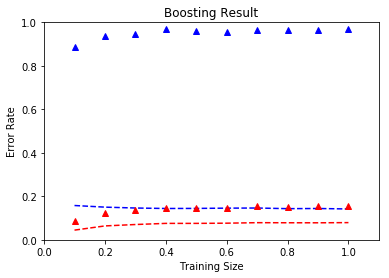

In [9]:
plt.plot(train_size,errorate_train,'r--',train_size,errorate_test,'b--',train_size,FP_train, 'r^', train_size,FP_test, 'b^')
plt.axis([0,1.1,0,1])
plt.ylabel('Error Rate')
plt.xlabel('Training Size')
plt.title('Boosting Result')
plt.savefig('E:/Machine Learning/HW1/Bank/Bank_Boosting_Error.png')

In [14]:
confusion_matrix(y_test,clf_boosting.predict(X_test))

array([[  32, 1055],
       [  41, 6602]], dtype=int64)

In [13]:
FP_test

[0.8877644894204232,
 0.9392824287028518,
 0.9475620975160993,
 0.968721251149954,
 0.9604415823367065,
 0.9567617295308187,
 0.9659613615455381,
 0.9668813247470102,
 0.9668813247470102,
 0.9705611775528978]

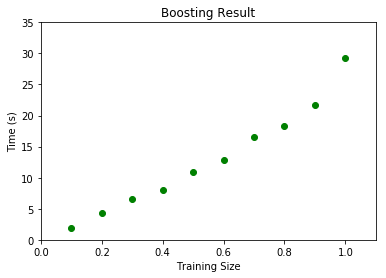

In [18]:
plt.plot(train_size,train_time,'go')
plt.axis([0,1.1,0,35])
plt.ylabel('Time (s)')
plt.xlabel('Training Size')
plt.title('Boosting Result')
plt.savefig('E:/Machine Learning/HW1/Bank/Bank_boosting_T.png')

In [4]:
from imblearn.under_sampling import RandomUnderSampler

In [19]:
rus=RandomUnderSampler(random_state=10, sampling_strategy=0.5)

In [20]:
X_res,y_res=rus.fit_resample(X_train_origin, y_train_origin)

In [23]:
Counter(y_res)

Counter({0: 4336, 1: 8672})

In [24]:
    clf_boosting=GradientBoostingClassifier(loss='exponential',subsample=0.5,max_depth=6,validation_fraction=0.1)
    clf_boosting.fit(X_res,y_res)
    y_predict_train_res=clf_boosting.predict(X_res)
    y_predict_test=clf_boosting.predict(X_test)
    errorate_train_res=1-accuracy_score(y_res,y_predict_train_res)
    errorate_test_res=1-accuracy_score(y_test,y_predict_test)
    error_train=y_predict_train_res-y_res
    FP_train_res=Counter(error_train)[1]/Counter(y_res)[0]
    error_test=y_predict_test-y_test
    FP_test_res=Counter(error_test)[1]/Counter(y_test)[0]

In [25]:
FP_test_res

0.6936522539098436

In [26]:
FP_train_res

0.5027675276752768

In [27]:
errorate_test_res

0.21513583441138417

In [28]:
errorate_train_res

0.20195264452644524

In [29]:
confusion_matrix(y_test,y_predict_test)

array([[ 333,  754],
       [ 909, 5734]], dtype=int64)

In [82]:
res=RandomUnderSampler()

In [83]:
X_res,y_res=res.fit_resample(X_train_origin, y_train_origin)

In [84]:
Counter(y_res)[1]/Counter(y_res)[0]

1.0

In [85]:
    clf_boosting=GradientBoostingClassifier(loss='exponential',subsample=0.5,max_depth=6,validation_fraction=0.1)
    clf_boosting.fit(X_res,y_res)
    y_predict_train_res=clf_boosting.predict(X_res)
    y_predict_test=clf_boosting.predict(X_test)
    errorate_train_res=1-accuracy_score(y_res,y_predict_train_res)
    errorate_test_res=1-accuracy_score(y_test,y_predict_test)
    error_train=y_predict_train_res-y_res
    FP_train_res=Counter(error_train)[1]/Counter(y_res)[0]
    error_test=y_predict_test-y_test
    FP_test_res=Counter(error_test)[1]/Counter(y_test)[0]

In [86]:
print(errorate_test_res,FP_test_res,errorate_train_res,FP_train_res)

0.38266494178525223 0.33946642134314625 0.19049815498154976 0.18357933579335795


In [87]:
cohen_kappa_score(y_test,y_predict_test)

0.1460573833436124

In [88]:
math.sqrt(24946*0.75/2)

96.71995657567264